In [103]:
# Historical NFL Draft Analysis of Each NFL Franchise Using Pro Football Reference's Career Weighted Approximate Value (wAV)
# Paolo Mondini

In [37]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
# Every player drafted in the NFL from 1967-2024
df = pd.read_csv("final_project_data.csv")
df

,Team,Year,Rnd,Player,Pick,Pos,To,AP1,PB,St,...,RushAtt,RushYds,RushTD,Rec,RecYds,RecTD,Int,Sk,College/Univ,PlayerID
0,Patriots,2000,6,Tom Brady,199,QB,2022.0,3,15,21,...,693.0,1123.0,28.0,3.0,65.0,0.0,NaN,NaN,Michigan,BradTo00
1,Colts,1998,1,Peyton Manning HOF,1,QB,2015.0,7,14,17,...,431.0,667.0,18.0,1.0,-2.0,0.0,NaN,NaN,Tennessee,MannPe00
2,Chargers,2001,2,Drew Brees,32,QB,2020.0,1,13,19,...,498.0,752.0,25.0,8.0,74.0,1.0,NaN,NaN,Purdue,BreeDr00
3,Packers,2005,1,Aaron Rodgers,24,QB,2024.0,4,10,15,...,741.0,3573.0,35.0,3.0,-11.0,0.0,NaN,NaN,California,RodgAa00
4,Ravens,1996,1,Ray Lewis HOF,26,LB,2012.0,7,12,14,...,NaN,NaN,0.0,NaN,NaN,0.0,31.0,41.5,Miami (FL),LewiRa00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17895,Buccaneers,1984,10,Jim Gallery,254,K,1990.0,0,0,0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Minnesota,gallejam01
17896,Patriots,2001,7,Owen Pochman,216,K,2003.0,0,0,0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,BYU,pochmowe01
17897,Bills,1968,13,Dan Darragh,336,QB,1970.0,0,0,1,...,20.0,51.0,0.0,NaN,NaN,0.0,NaN,NaN,William & Mary,DarrDa00
17898,Eagles,1971,4,Happy Feller,83,K,1973.0,0,0,0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Texas,FellHa20


In [109]:
# Remove rows where 'G' (Games Played) is NaN
# This helped balance out all the players in the 60s/70s that were drafted that never played a game since some years there were 20 rounds
df = df.dropna(subset=['G'])

In [111]:
# Table showing each NFL franchises total draft picks, total wAV, & wAV Per Draft Pick
# This shows, in general, which NFL franchises have historically drafted the best players
team_draft_stats = {}

for team in df['Team'].unique():
    team_df = df[df['Team'] == team]
    total_picks = len(team_df)
    total_wAV = team_df['wAV'].sum()
    wAV_per_pick = total_wAV / total_picks 
    
    team_draft_stats[team] = {
        'Total Draft Picks': total_picks,
        'Total wAV': total_wAV,
        'wAV Per Draft Pick': wAV_per_pick
    }

team_draft_df = pd.DataFrame.from_dict(team_draft_stats, orient='index')
team_draft_df = team_draft_df.sort_values(by='wAV Per Draft Pick', ascending=False)

print(team_draft_df)

            Total Draft Picks  Total wAV  wAV Per Draft Pick
Steelers                  488    10322.0           21.151639
Cowboys                   462     9535.0           20.638528
Dolphins                  453     9154.0           20.207506
Ravens                    222     4453.0           20.058559
Patriots                  471     9061.0           19.237792
49ers                     453     8698.0           19.200883
Colts                     455     8693.0           19.105495
Vikings                   430     8209.0           19.090698
Seahawks                  360     6815.0           18.930556
Panthers                  201     3788.0           18.845771
Rams                      474     8928.0           18.835443
Saints                    416     7775.0           18.689904
Packers                   486     9053.0           18.627572
Lions                     430     7887.0           18.341860
Giants                    422     7723.0           18.300948
Eagles                  

<Axes: title={'center': 'wAV Per Draft Pick'}>

Text(0, 0.5, 'wAV Per Draft Pick')

Text(0.5, 0, 'Team')

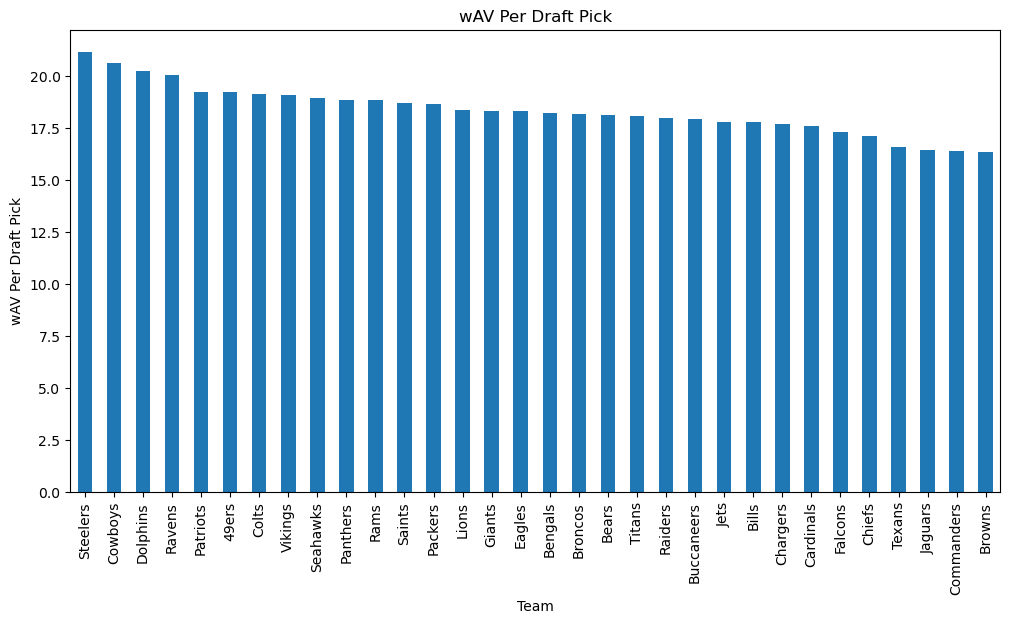

In [113]:
# Bar chart of wAV Per Draft Pick from table above
team_draft_df['wAV Per Draft Pick'].plot(kind='bar', figsize=(12,6), title='wAV Per Draft Pick')
plt.ylabel('wAV Per Draft Pick')
plt.xlabel('Team')
plt.show()
plt.close()

In [117]:
# Table showing which teams have drafted the best in each round of the NFL Draft based on wAV Per Draft Pick
best_team_per_round = {}

for round_num in range(1, 8):
    round_df = df[df['Rnd'] == round_num]
    round_team_stats = {}
    
    for team in round_df['Team'].unique():
        team_round_df = round_df[round_df['Team'] == team]
        total_picks = len(team_round_df)
        total_wAV = team_round_df['wAV'].sum()
        wAV_per_pick = total_wAV / total_picks
        
        round_team_stats[team] = wAV_per_pick
    
    if round_team_stats:
        best_team = max(round_team_stats, key=round_team_stats.get)
        best_team_per_round[round_num] = (best_team, round_team_stats[best_team])

best_team_df = pd.DataFrame.from_dict(best_team_per_round, orient='index', columns=['Team', 'wAV Per Draft Pick'])
print(best_team_df)

       Team  wAV Per Draft Pick
1    Ravens           52.125000
2    Giants           34.132075
3  Steelers           24.371429
4   Packers           21.351852
5   Packers           16.819672
6  Steelers           15.482143
7    Eagles           14.767442


In [119]:
# Table showing which teams have drafted the worst in each round of the NFL Draft based on wAV Per Draft Pick
worst_team_per_round = {}

for round_num in range(1, 8):  
    round_df = df[df['Rnd'] == round_num]
    round_team_stats = {}
    
    for team in round_df['Team'].unique():
        team_round_df = round_df[round_df['Team'] == team]
        total_picks = len(team_round_df)
        total_wAV = team_round_df['wAV'].sum()
        wAV_per_pick = total_wAV / total_picks
        
        round_team_stats[team] = wAV_per_pick
    
    if round_team_stats:
        worst_team = min(round_team_stats, key=round_team_stats.get)
        worst_team_per_round[round_num] = (worst_team, round_team_stats[worst_team])

worst_team_df = pd.DataFrame.from_dict(worst_team_per_round, orient='index', columns=['Team', 'wAV Per Draft Pick'])
print(worst_team_df)

         Team  wAV Per Draft Pick
1      Eagles           33.960784
2  Commanders           18.024390
3      Texans           14.233333
4     Jaguars           10.218750
5      Texans            6.500000
6     Jaguars            4.740741
7      Ravens            4.055556


  Best Team  Best wAV Per Draft Pick  Worst Team  Worst wAV Per Draft Pick
1    Ravens                52.125000      Eagles                 33.960784
2    Giants                34.132075  Commanders                 18.024390
3  Steelers                24.371429      Texans                 14.233333
4   Packers                21.351852     Jaguars                 10.218750
5   Packers                16.819672      Texans                  6.500000
6  Steelers                15.482143     Jaguars                  4.740741
7    Eagles                14.767442      Ravens                  4.055556


<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

Text(0.5, 0, 'Draft Round')

Text(0, 0.5, 'wAV Per Draft Pick')

Text(0.5, 1.0, 'Best & Worst Team Per Round By wAV Per Draft Pick')

[Text(1, 0, 'Round 1\nBest: Ravens\nWorst: Eagles'),
 Text(2, 0, 'Round 2\nBest: Giants\nWorst: Commanders'),
 Text(3, 0, 'Round 3\nBest: Steelers\nWorst: Texans'),
 Text(4, 0, 'Round 4\nBest: Packers\nWorst: Jaguars'),
 Text(5, 0, 'Round 5\nBest: Packers\nWorst: Texans'),
 Text(6, 0, 'Round 6\nBest: Steelers\nWorst: Jaguars'),
 Text(7, 0, 'Round 7\nBest: Eagles\nWorst: Ravens')]

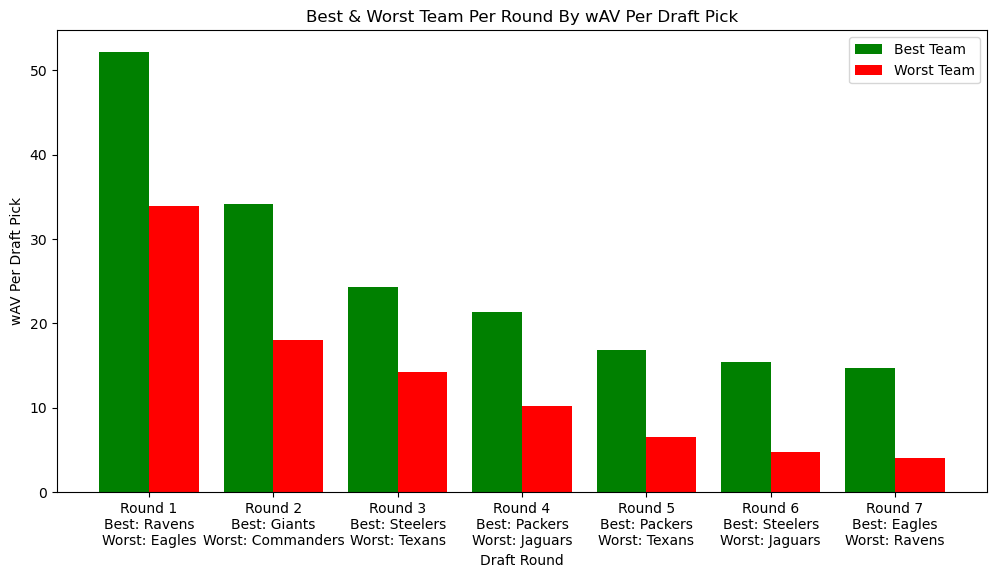

In [121]:
# Graph showing the gap between the best and worst team in each round
best_worst_team_per_round = {}

for round_num in range(1, 8):
    round_df = df[df['Rnd'] == round_num]
    round_team_stats = {}
    
    for team in round_df['Team'].unique():
        team_round_df = round_df[round_df['Team'] == team]
        total_picks = len(team_round_df)
        total_wAV = team_round_df['wAV'].sum()
        wAV_per_pick = total_wAV / total_picks
        
        round_team_stats[team] = wAV_per_pick
    
    if round_team_stats:
        best_team = max(round_team_stats, key=round_team_stats.get)
        worst_team = min(round_team_stats, key=round_team_stats.get)
        best_worst_team_per_round[round_num] = {
            'Best Team': best_team, 'Best wAV Per Draft Pick': round_team_stats[best_team],
            'Worst Team': worst_team, 'Worst wAV Per Draft Pick': round_team_stats[worst_team]
        }

best_worst_team_df = pd.DataFrame.from_dict(best_worst_team_per_round, orient='index')
print(best_worst_team_df)

fig, ax = plt.subplots(figsize=(12,6))
width = 0.4
rounds = best_worst_team_df.index
best_teams = best_worst_team_df['Best Team']
worst_teams = best_worst_team_df['Worst Team']
ax.bar(rounds - width/2, best_worst_team_df['Best wAV Per Draft Pick'], width=width, label='Best Team', color='green')
ax.bar(rounds + width/2, best_worst_team_df['Worst wAV Per Draft Pick'], width=width, label='Worst Team', color='red')
ax.set_xlabel('Draft Round')
ax.set_ylabel('wAV Per Draft Pick')
ax.set_title('Best & Worst Team Per Round By wAV Per Draft Pick')
ax.legend()
ax.set_xticks(rounds)
ax.set_xticklabels([f'Round {r}\nBest: {best}\nWorst: {worst}' for r, best, worst in zip(rounds, best_teams, worst_teams)])
plt.show()
plt.close()

In [123]:
# Table showing each teams wAV Per Draft Pick in the 1st round only
round_1_stats = {}

round_1_df = df[df['Rnd'] == 1] 

for team in round_1_df['Team'].unique():
    team_round_1_df = round_1_df[round_1_df['Team'] == team]
    total_picks = len(team_round_1_df)
    total_wAV = team_round_1_df['wAV'].sum()
    wAV_per_pick = total_wAV / total_picks
    
    round_1_stats[team] = {
        'Total 1st Round Picks': total_picks,
        'Total wAV': total_wAV,
        'wAV Per Draft Pick': wAV_per_pick
    }

round_1_df_summary = pd.DataFrame.from_dict(round_1_stats, orient='index')
round_1_df_summary = round_1_df_summary.sort_values(by='wAV Per Draft Pick', ascending=False)

print(round_1_df_summary)

            Total 1st Round Picks  Total wAV  wAV Per Draft Pick
Ravens                         32     1668.0           52.125000
Colts                          59     2884.0           48.881356
Texans                         22     1039.0           47.227273
Vikings                        61     2876.0           47.147541
Rams                           58     2688.0           46.344828
Steelers                       57     2586.0           45.368421
Titans                         54     2402.0           44.481481
Buccaneers                     44     1948.0           44.272727
Panthers                       30     1328.0           44.266667
Cowboys                        55     2409.0           43.800000
Falcons                        57     2462.0           43.192982
Patriots                       64     2763.0           43.171875
Seahawks                       46     1966.0           42.739130
Bills                          60     2558.0           42.633333
Chargers                 

In [125]:
# Table showing which NFL franchises have had the best individual draft classes based on wAV Per Draft Pick
draft_class_stats = {}

for (team, year), group in df.groupby(['Team', 'Year']):
    total_picks = len(group)
    total_wAV = group['wAV'].sum()
    wAV_per_pick = total_wAV / total_picks if total_picks > 0 else 0
    
    draft_class_stats[(team, year)] = {
        'Total Picks': total_picks,
        'Total wAV': total_wAV,
        'wAV Per Draft Pick': wAV_per_pick
    }

draft_class_df = pd.DataFrame.from_dict(draft_class_stats, orient='index')
draft_class_df = draft_class_df.sort_values(by='wAV Per Draft Pick', ascending=False).head(10)

print(draft_class_df)

                 Total Picks  Total wAV  wAV Per Draft Pick
Saints     1999            1       77.0           77.000000
49ers      1985            3      188.0           62.666667
Rams       1971            5      308.0           61.600000
Commanders 1999            3      173.0           57.666667
Saints     2006            7      397.0           56.714286
Giants     2004            5      274.0           54.800000
Colts      1998            5      265.0           53.000000
Dolphins   1983            7      371.0           53.000000
Commanders 1969            3      157.0           52.333333
Broncos    2006            6      308.0           51.333333


<Axes: title={'center': 'Top 10 Draft Classes By wAV Per Draft Pick'}>

Text(0, 0.5, 'wAV Per Draft Pick')

Text(0.5, 0, 'Team, Year')

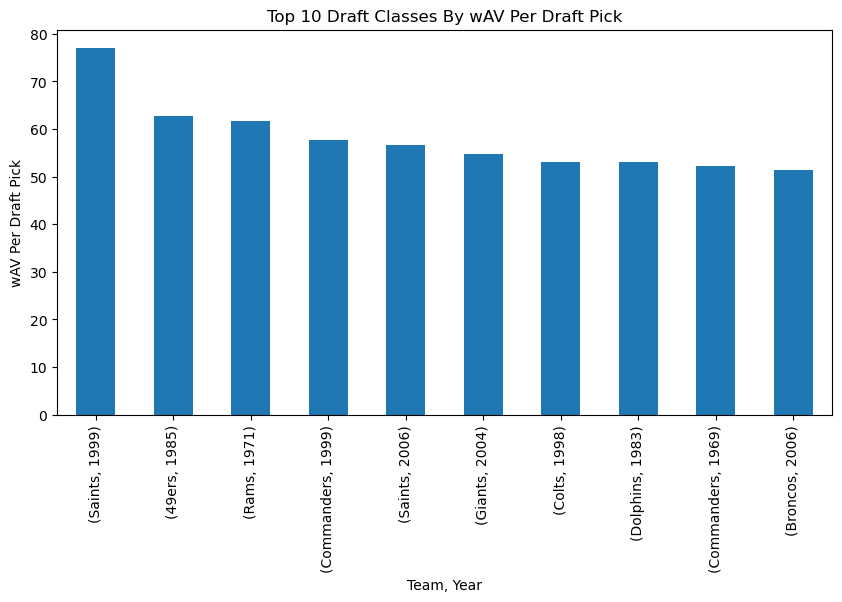

In [127]:
# Graph showing table above
draft_class_df['wAV Per Draft Pick'].plot(kind='bar', figsize=(10,5), title='Top 10 Draft Classes By wAV Per Draft Pick')
plt.ylabel('wAV Per Draft Pick')
plt.xlabel('Team, Year')
plt.show()
plt.close()

In [129]:
# Table showing which NFL franchises have had the worst individual draft classes based on wAV Per Draft Pick
draft_class_df = pd.DataFrame.from_dict(draft_class_stats, orient='index')
draft_class_df.index = pd.MultiIndex.from_tuples(draft_class_df.index, names=['Team', 'Year'])

years = draft_class_df.index.get_level_values('Year').astype(int)

draft_class_df_filtered = draft_class_df[(draft_class_df['Total Picks'] >= 4) & (years >= 1967) & (years <= 2014)]

draft_class_worst_df = draft_class_df_filtered.sort_values(by='wAV Per Draft Pick', ascending=True).head(5)

print(draft_class_worst_df)

               Total Picks  Total wAV  wAV Per Draft Pick
Team     Year                                            
Cowboys  2009           10       17.0               1.700
49ers    1977            6       12.0               2.000
Rams     1982            8       29.0               3.625
Chargers 1998            4       15.0               3.750
Jets     1986           10       38.0               3.800
